In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [74]:
jup = np.load("explorative_analysis/10_bins_expected_images_polynomial.npy")

In [75]:
scri = np.load("datasets/expected_images/runstart16_X2_expected.npy")

In [69]:
scri[0]

array([[ 1.07841085, -2.3683767 , -0.55647687, ..., -1.08169471,
         1.92958345,  0.48154042],
       [-0.00853024,  0.24824681, -2.2498922 , ..., -2.84397503,
        -0.81452486,  1.48839027],
       [-1.08944287,  0.55738148,  0.75377707, ..., -0.58947108,
        -1.4457596 , -0.37903626],
       ...,
       [-1.94491738,  0.35161878,  0.40601757, ...,  0.09793244,
        -0.84654626, -0.61397589],
       [ 0.21015844, -2.05859238,  1.5726742 , ..., -1.7388309 ,
         0.62883615, -3.33772836],
       [-1.58426338, -0.76360786, -0.52095578, ..., -1.43137158,
         0.4006187 ,  0.34616089]])

In [70]:
jup[0]

array([[ 1.07841085, -2.3683767 , -0.55647687, ..., -1.08169471,
         1.92958345,  0.48154042],
       [-0.00853024,  0.24824681, -2.2498922 , ..., -2.84397503,
        -0.81452486,  1.48839027],
       [-1.08944287,  0.55738148,  0.75377707, ..., -0.58947108,
        -1.4457596 , -0.37903626],
       ...,
       [-1.94491738,  0.35161878,  0.40601757, ...,  0.09793244,
        -0.84654626, -0.61397589],
       [ 0.21015844, -2.05859238,  1.5726742 , ..., -1.7388309 ,
         0.62883615, -3.33772836],
       [-1.58426338, -0.76360786, -0.52095578, ..., -1.43137158,
         0.4006187 ,  0.34616089]])

In [72]:
scri[0]-jup[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('..')

from utils.visualization_tools import *
import utils.visualization_tools
from utils.data_transformations import *
import utils.data_transformations
from utils.diverse import *
import utils.diverse

In [45]:
def gaussian_filter_nan(U, sigma):
    """ Filters nan in masked images such that the masked are stays of constant size"""
    V=U.copy()
    V[np.isnan(U)]=0
    VV=scipy.ndimage.gaussian_filter(V,sigma=sigma)

    W=0*U.copy()+1
    W[np.isnan(U)]=0
    WW=scipy.ndimage.gaussian_filter(W,sigma=sigma)

    Z=VV/WW
    Z[np.isnan(U)] = np.nan
    return Z

In [46]:
import numpy as np
import scipy as sp
import scipy.ndimage

sigma=2.0                  # standard deviation for Gaussian kernel
truncate=4.0               # truncate filter at this many sigmas

U=np.ones((100,100))         # random array...
U[:,40:60] = 0
U[:40]=np.nan              # ...with NaNs for testing

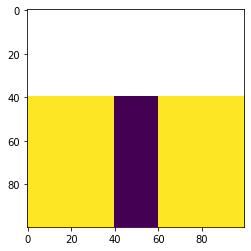

In [47]:
import matplotlib.pyplot as plt
plt.imshow(U)

/home/elerator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


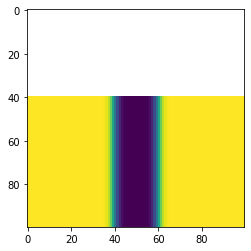

In [50]:
plt.imshow(gaussian_filter_nan(U, 2))

In [328]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('..')

from utils.visualization_tools import *
import utils.visualization_tools
from utils.data_transformations import *
import utils.data_transformations
from utils.diverse import *
import utils.diverse

In [2]:
tensor = np.load("datasets/contrast_to_pixelwise_mean/runstart16_X1.npy")[:1000]

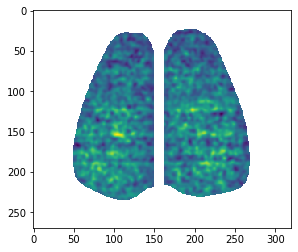

In [3]:
plt.imshow(tensor[1])

In [15]:
from scipy import ndimage
from scipy.ndimage import grey_erosion, gaussian_filter, grey_closing

In [16]:
out = []
for idx in range(1000):
    img = tensor[idx].copy()
    img[np.isnan(img)] = np.nanmean(img)
    res = grey_closing(gaussian_filter(img,10), 10)
    res[np.isnan(tensor[0])] = np.nan
    out.append(res)

In [17]:
out = np.array(out)

In [18]:
out[:,np.isnan(tensor[0])] = 0

In [19]:
out -= np.min(out)

In [20]:
out /= np.max(out)

In [21]:
out = remove_frequency_from_pixel_vectors(out, 10, 20, approach="fourier")

In [22]:
out[:,np.isnan(tensor[0])] = np.nan

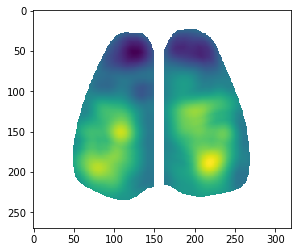

In [23]:
plt.imshow(out[0])

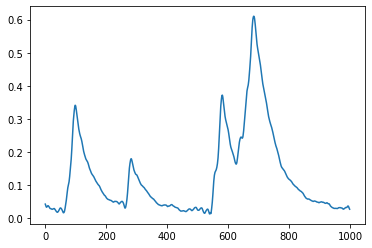

In [24]:
plt.plot(np.nanmean(np.array(out),axis=(1,2)))

In [25]:
np.save("test.npy", out)

# Remove background from every frame

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [51]:
tensor = np.load("datasets/contrast_to_pixelwise_mean/runstart16_X1.npy")

In [61]:
bg = np.nanmean(tensor,axis=0)
tensor /= bg

/home/elerator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [60]:
np.save("devided_by_bg.npy",tensor)